<a href="https://colab.research.google.com/github/C-SIN-IN2028-001-2213/ProyectoFinal-Equipo4/blob/main/ProyectoFinal_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyeto Final

Christian Martinez - A01740885

David Romero - A01740866

In [7]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import numpy as np
import chardet
print("Setup Complete")

Setup Complete


In [8]:
Datos = pd.read_csv('https://raw.githubusercontent.com/C-SIN-IN2028-001-2213/ProyectoFinal-Equipo4/main/data/Datos.csv?token=GHSAT0AAAAAAB3AGK7SAX5A7QRU2BEP5R7EY36OD6A')
Datos

,City,Country,Edition,Sport,Discipline,Athlete,NOC,Country.1,Gender,Event,Event_gender,Medal
0,Athens,Greece,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Hungary,Men,100m freestyle,Men,Gold
1,Athens,Greece,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Austria,Men,100m freestyle,Men,Silver
2,Athens,Greece,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Greece,Men,100m freestyle for sailors,Men,Bronze
3,Athens,Greece,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Greece,Men,100m freestyle for sailors,Men,Gold
4,Athens,Greece,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Greece,Men,100m freestyle for sailors,Men,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,China,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Germany,Men,84 - 96kg,Men,Silver
29212,Beijing,China,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Lithuania,Men,96 - 120kg,Men,Bronze
29213,Beijing,China,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Armenia,Men,96 - 120kg,Men,Bronze
29214,Beijing,China,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Cuba,Men,96 - 120kg,Men,Gold


In [9]:
Datos['Country.1'] = Datos['Country.1'].replace('#N/D','Unknown')

1. Hacer un informe donde 
se visualicen las medallas 
ganadas por México (oro, 
plata, bronce) a lo largo 
de la historia. Identifica  
Atleta y Medallas 
conquistadas

In [10]:
mx = Datos[Datos['Country.1']=='Mexico']

mx[['Athlete','Medal','Gender','Sport','Discipline','Event','Edition','Country']]

,Athlete,Medal,Gender,Sport,Discipline,Event,Edition,Country
5918,"CABANAS, Francisco",Silver,Men,Boxing,Boxing,- 50.8kg (flyweight),1932,United States
6271,"HUET BOBADILLA, Gustavo",Silver,Men,Shooting,Shooting,50m rifle prone (60 shots),1932,United States
6537,"BORJA MORCA, Carlos",Bronze,Men,Basketball,Basketball,basketball,1936,Germany
6538,"BORJA MORCA, Victor Hugo",Bronze,Men,Basketball,Basketball,basketball,1936,Germany
6539,"CHOPERENA IRIZARRI, Rodolfo",Bronze,Men,Basketball,Basketball,basketball,1936,Germany
...,...,...,...,...,...,...,...,...
26958,"SALAZAR BLANCO, Iridia",Bronze,Women,Taekwondo,Taekwondo,49 - 57 kg,2004,Greece
27192,"ESPINOSA, Paola",Bronze,Women,Aquatics,Diving,synchronized diving 10m platform,2008,China
27193,"ORTIZ, Tatiana",Bronze,Women,Aquatics,Diving,synchronized diving 10m platform,2008,China
28966,"PEREZ, Guillermo",Gold,Men,Taekwondo,Taekwondo,- 58 kg,2008,China


In [11]:
Medallasmx = pd.DataFrame(mx.groupby(['Athlete', 'Medal'])['Medal'].count())
Medallasmx = Medallasmx.rename(columns={'Medal': '#Medals'})
Medallasmx.sort_values(by='#Medals', ascending=False)

,,#Medals
Athlete,Medal,
"MARILES CORTES, Humberto",Gold,2
"PEREZ DE LA HERAS, Joaquin",Bronze,2
"CAPILLA PEREZ, Joaquin",Bronze,2
"RAMIREZ, Maria Teresa",Bronze,1
"PEREZ, Guillermo",Gold,1
...,...,...
"GOMEZ DOMINGUEZ, Andres",Bronze,1
"GIRON, Carlos",Silver,1
"GAXIOLA ROBLES, Alvaro",Silver,1


In [12]:
Totalmedallasmx = Medallasmx.groupby('Medal').count()
Totalmedallasmx

,#Medals
Medal,
Bronze,46
Gold,13
Silver,18


Text(0.5, 1.0, 'Medallas ganadas por México a lo largo de la historia')

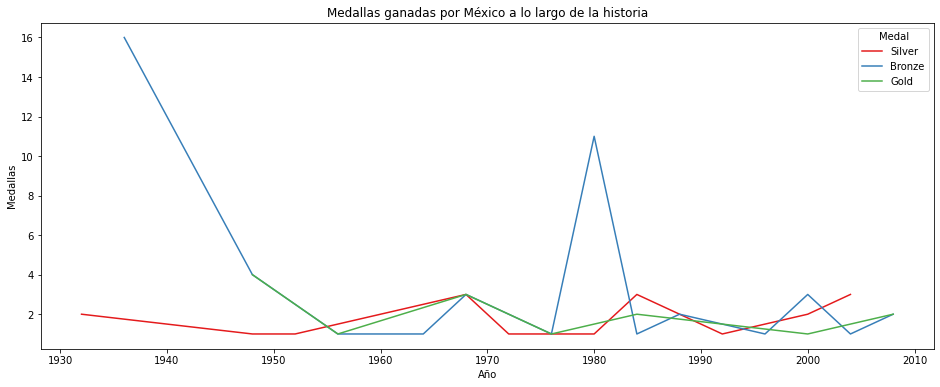

In [13]:
grafica1 = mx.groupby(['Edition', 'Medal']).Medal.agg([len])
plt.figure(figsize=(16,6))
sns.lineplot(data=grafica1, x='Edition', y='len', hue='Medal',palette=sns.color_palette("Set1")[:3])
plt.xlabel("Año")
plt.ylabel("Medallas")
plt.title("Medallas ganadas por México a lo largo de la historia")

Text(0.5, 1.0, 'Medallas ganadas por México a lo largo de la historia')

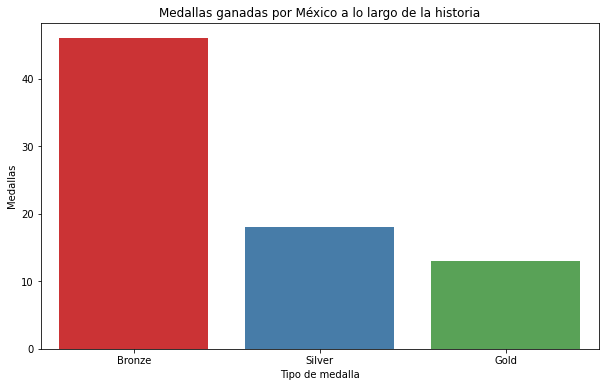

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=Totalmedallasmx.index, y=Totalmedallasmx['#Medals'], order=['Bronze', 'Silver', 'Gold'],palette=sns.color_palette("Set1"))
plt.xlabel("Tipo de medalla")
plt.ylabel("Medallas")
plt.title("Medallas ganadas por México a lo largo de la historia")

2. Hacer un informe donde 
se visualicen el número de 
medallas  ganadas por: 
tipo de medalla, 
disciplina, país y edición. 
Distingue con colores el 
tipo de medalla.

In [39]:
I2 = pd.DataFrame(Datos.groupby(['Country.1','Edition','Discipline','Medal'])['Medal'].count())
I2 = I2.rename(columns={'Medal': '#Medals'})
I2

#Medals
Country.1   Edition Discipline Medal          
Afghanistan 2008    Taekwondo  Bronze        1
Algeria     1984    Boxing     Bronze        2
            1992    Athletics  Gold          1
                    Boxing     Bronze        1
            1996    Athletics  Gold          1
...                                        ...
Zimbabwe    2004    Swimming   Bronze        1
                               Gold          1
                               Silver        1
            2008    Swimming   Gold          1
                               Silver        3

[7521 rows x 1 columns]

Text(0.5, 0, 'Número de medallas')

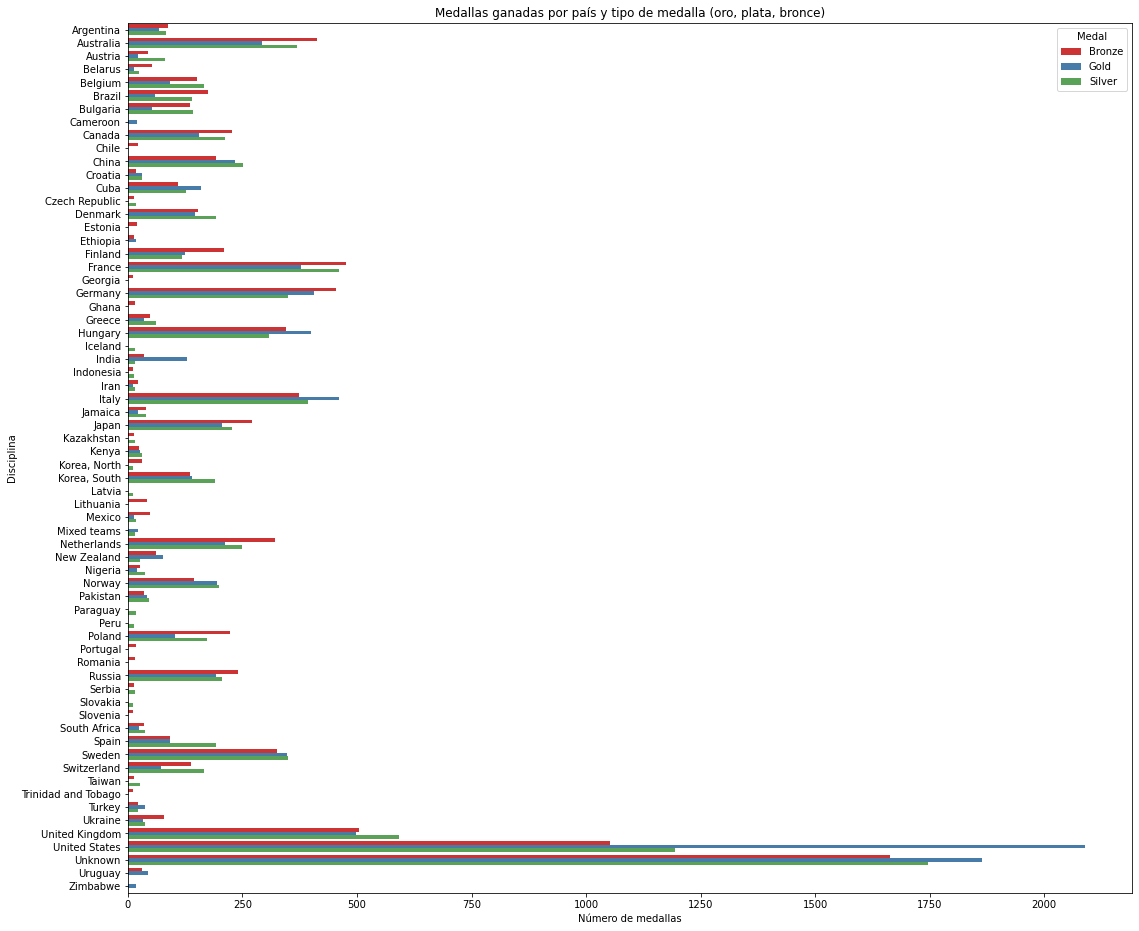

In [16]:
Grafica21 = Datos.groupby(['Country.1', 'Medal']).Medal.agg([len])
Grafica21 = Grafica21[Grafica21['len']>10]
Grafica21.reset_index(level=0,inplace=True)
Grafica21.reset_index(level=0,inplace=True)
plt.figure(figsize=(18,16))
sns.barplot(y="Country.1", x="len", data=Grafica21, hue="Medal", estimator=sum,palette=sns.color_palette("Set1"))
plt.title("Medallas ganadas por país y tipo de medalla (oro, plata, bronce)")
plt.ylabel("Disciplina")
plt.xlabel("Número de medallas")

Text(0.5, 0, 'Edición')

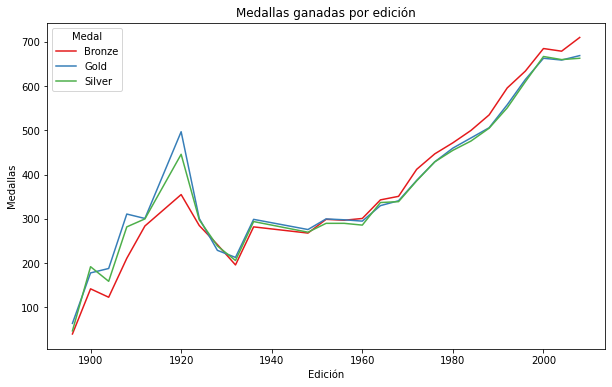

In [40]:
Grafica22 = Datos.groupby(['Edition', 'Medal']).Medal.agg([len])
Grafica22.reset_index(level=0,inplace=True)
Grafica22.reset_index(level=0,inplace=True)
plt.figure(figsize=(10,6))
sns.lineplot(data=Grafica22, x='Edition', y='len', hue='Medal',palette=sns.color_palette("Set1")[:3])
plt.title("Medallas ganadas por edición")
plt.ylabel("Medallas")
plt.xlabel("Edición")

Text(0.5, 0, 'Número de medallas')

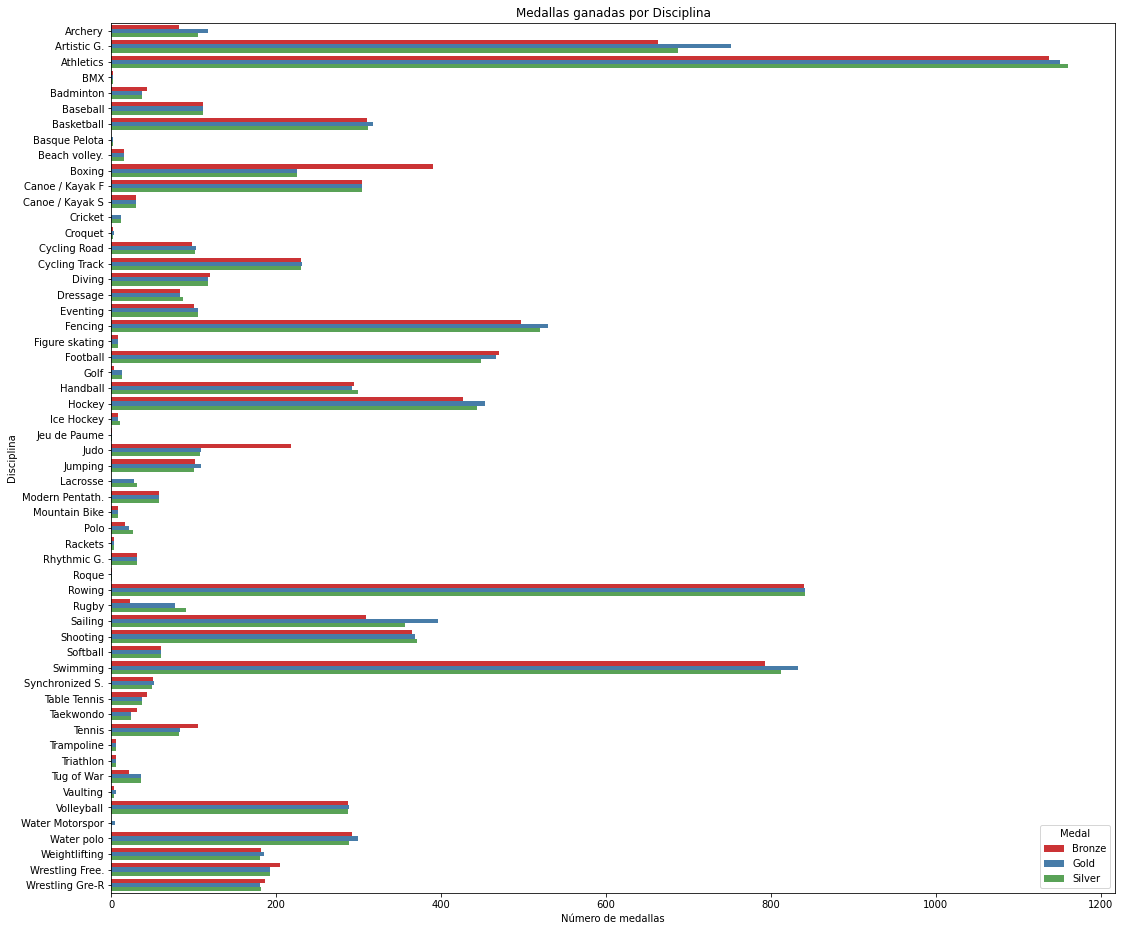

In [41]:
Grafica23 = Datos.groupby(['Discipline', 'Medal']).Medal.agg([len])
Grafica23.reset_index(level=0,inplace=True)
Grafica23.reset_index(level=0,inplace=True)
plt.figure(figsize=(18,16))
sns.barplot(y="Discipline", x="len", data=Grafica23, hue="Medal", estimator=sum,palette=sns.color_palette("Set1"))
plt.title("Medallas ganadas por Disciplina")
plt.ylabel("Disciplina")
plt.xlabel("Número de medallas")

3. Hacer un informe donde 
se visualice el país donde 
se celebraron los juegos 
Olímpicos, el número de 
medallas ganadas por 
disciplina, el tipo de 
medalla y atleta. Este 
informe deberá mostrarse 
en un mapa del planeta.

In [42]:
I3 = pd.DataFrame(Datos.groupby(['Country','Edition','Athlete','Discipline','Medal'])['Medal'].count())
I3 = I3.rename(columns={'Medal': '#Medals'})
I3

#Medals
Country       Edition Athlete              Discipline Medal          
Australia     1956    ABDUL, Hamid         Hockey     Silver        1
                      ABERNETHY, Moira     Swimming   Bronze        1
                      AFRIKA               Dressage   Silver        1
                      AGEEV, Viktor        Water polo Bronze        1
                      AHKTAR, Hussain      Hockey     Silver        1
...                                                               ...
United States 1996    ZUKAUSKAS, Mindaugas Basketball Bronze        1
                      ZVEREVA, Ellina      Athletics  Bronze        1
                      ZWERVER, Ronald      Volleyball Gold          1
                      ZWIERS, Claudia      Judo       Bronze        1
                      ZWOLLE, Hendrik Jan  Rowing     Gold          1

[27686 rows x 1 columns]

In [43]:
I32 = pd.DataFrame(Datos.groupby(['Country','Edition','Discipline','Medal'])['Medal'].count())
I32 = I32.rename(columns={'Medal': '#Medals'})
I32

#Medals
Country       Edition Discipline      Medal          
Australia     1956    Artistic G.     Bronze       37
                                      Gold         32
                                      Silver       31
                      Athletics       Bronze       42
                                      Gold         42
...                                               ...
United States 1996    Wrestling Free. Gold         10
                                      Silver       10
                      Wrestling Gre-R Bronze       10
                                      Gold         10
                                      Silver       10

[2029 rows x 1 columns]

In [21]:
def mededicion(Datos,Discipline,Medal,top):
  I33 = Datos.groupby(['Edition','Country','Discipline','Medal','NOC']).Medal.agg([len])
  I33.reset_index(level=0,inplace=True)
  I33.reset_index(level=0,inplace=True)
  I33.reset_index(level=0,inplace=True)
  I33.reset_index(level=0,inplace=True)
  I33.reset_index(level=0,inplace=True)

  I33 = I33[I33['Discipline']==Discipline]
  I33 = I33[I33['Medal']==Medal]
  I33 = I33.sort_values(by='len',ascending=False).head(top)
  return I33

def Mapa(Datos,Discipline,Medal,top):
  I33 = mededicion(Datos,Discipline,Medal,top)
  I34 = I33.groupby(['NOC','Edition']).len.agg([sum])
  I34 = I34.rename(columns={'sum': '#Medals'})
  I34.reset_index(level=0,inplace=True)
  I34.reset_index(level=0,inplace=True)

  fig = px.choropleth(I34,locations = 'NOC', color = '#Medals',hover_name='Edition',
                    color_continuous_scale=px.colors.sequential.Plasma)

  fig.show()

In [22]:
mededicion(Datos,'Archery','Gold',10)

,NOC,Medal,Discipline,Country,Edition,len
597,BEL,Gold,Archery,Belgium,1920,32
193,USA,Gold,Archery,United States,1904,12
599,NED,Gold,Archery,Belgium,1920,8
4658,KOR,Gold,Archery,South Korea,1988,7
6733,KOR,Gold,Archery,Greece,2004,7
6126,KOR,Gold,Archery,Australia,2000,7
7350,KOR,Gold,Archery,China,2008,6
5581,USA,Gold,Archery,United States,1996,4
5580,KOR,Gold,Archery,United States,1996,4
5095,KOR,Gold,Archery,Spain,1992,4


In [23]:
Mapa(Datos,'Archery','Gold',10)

In [44]:
mededicion(Datos,'Judo','Silver',10)

,NOC,Medal,Discipline,Country,Edition,len
5875,JPN,Silver,Judo,United States,1996,4
5876,KOR,Silver,Judo,United States,1996,4
5369,JPN,Silver,Judo,Spain,1992,4
7663,CUB,Silver,Judo,China,2008,3
4127,CUB,Silver,Judo,Russia,1980,3
7049,RUS,Silver,Judo,Greece,2004,2
4866,FRG,Silver,Judo,South Korea,1988,2
4867,GDR,Silver,Judo,South Korea,1988,2
6440,KOR,Silver,Judo,Australia,2000,2
6439,JPN,Silver,Judo,Australia,2000,2


In [45]:
Mapa(Datos,'Judo','Silver',10)

4. Hacer un informe donde 
se visualicen las 
disciplinas donde México 
ha ganado, por tipo de 
medalla y cantidad

In [24]:
I4 = mx
I4 = mx.groupby(['Discipline','Medal']).Medal.agg([len])
I4

len
Discipline      Medal      
Athletics       Bronze    2
                Gold      3
                Silver    5
Basketball      Bronze   11
Boxing          Bronze    7
                Gold      2
                Silver    3
Cycling Track   Bronze    1
                Silver    1
Diving          Bronze    6
                Gold      1
                Silver    4
Eventing        Bronze    8
Fencing         Silver    1
Jumping         Bronze    6
                Gold      4
                Silver    1
Polo            Bronze    4
Shooting        Silver    1
Swimming        Bronze    1
                Gold      1
Taekwondo       Bronze    2
                Gold      2
                Silver    1
Weightlifting   Gold      1
Wrestling Gre-R Silver    1

Text(0.5, 0, 'Disciplina')

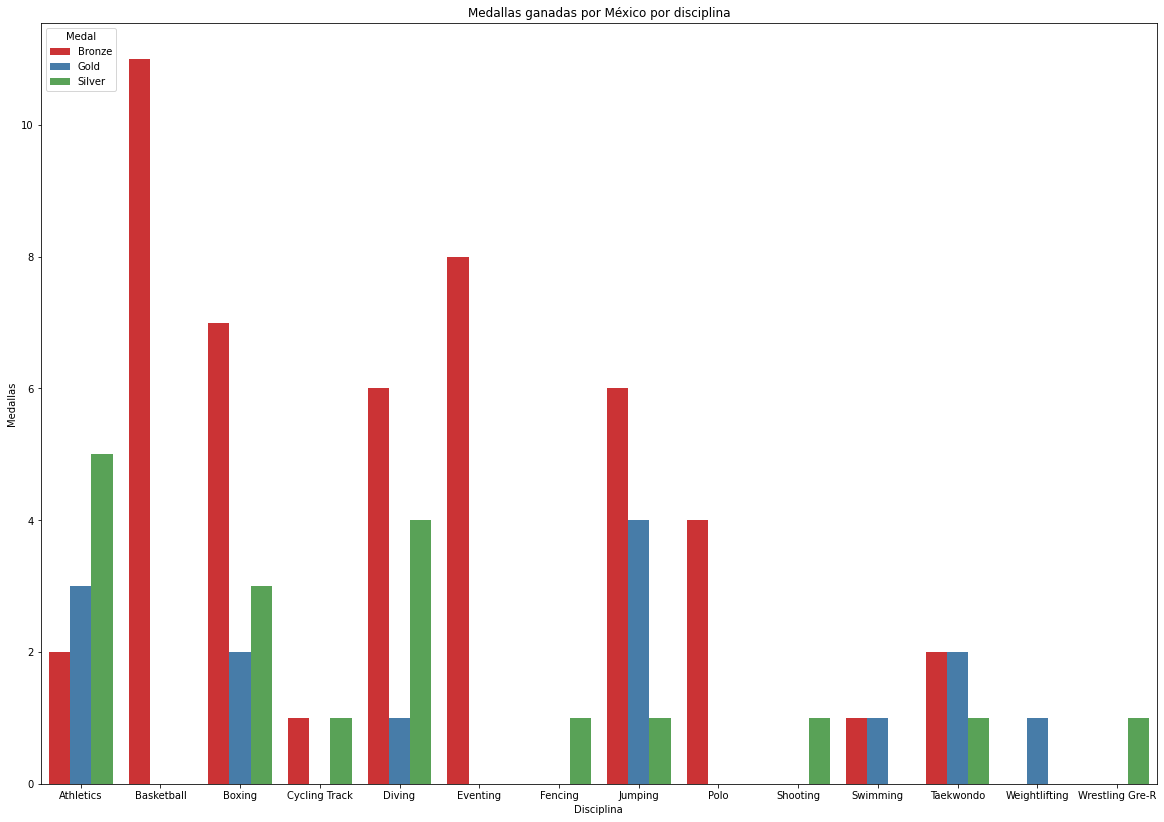

In [25]:
plt.figure(figsize=(20,14))
I4.reset_index(level=0,inplace=True)
I4.reset_index(level=0,inplace=True)
sns.barplot( data=I4,x="Discipline", y="len", hue="Medal", estimator=sum,palette=sns.color_palette("Set1"))
plt.title("Medallas ganadas por México por disciplina")
plt.ylabel("Medallas")
plt.xlabel("Disciplina")

Text(0.5, 60.0, 'Disciplina')

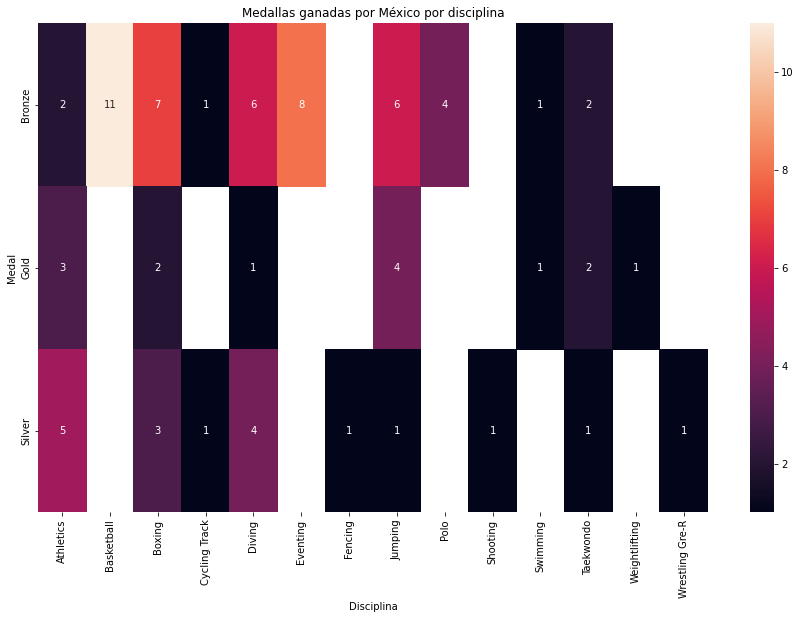

In [26]:
Grafica41=I4.pivot(index='Medal',columns='Discipline',values='len')
plt.figure(figsize=(15,9))
plt.title("Medallas ganadas por México por disciplina")
sns.heatmap(Grafica41, annot=True)
plt.xlabel("Disciplina")

5. Hacer un informe que 
visualice quien ha ganado 
más medallas de oro, 
plata y bronce mostrando 
cuantas, en que disciplina 
y de que país

In [27]:
I5 = pd.DataFrame(Datos.groupby(['Athlete', 'Country.1','Discipline']).Medal.agg([len]))

Amm = I5.sort_values(by='len',ascending=False).head(11)

Amm

,,,len
Athlete,Country.1,Discipline,
"LATYNINA, Larisa",Unknown,Artistic G.,18
"PHELPS, Michael",United States,Swimming,16
"ANDRIANOV, Nikolay",Unknown,Artistic G.,15
"MANGIAROTTI, Edoardo",Italy,Fencing,13
"ONO, Takashi",Japan,Artistic G.,13
"SHAKHLIN, Boris",Unknown,Artistic G.,13
"TORRES, Dara",United States,Swimming,12
"KATO, Sawao",Japan,Artistic G.,12
"THOMPSON, Jenny",United States,Swimming,12


In [28]:
Amm.reset_index(level=0,inplace=True)
Amm.reset_index(level=0,inplace=True)

Amm2 = Amm['Athlete']

In [29]:
def medallero(Datos,medal,top):
  I5 = Datos.groupby(['Athlete','Country.1','NOC','Discipline','Medal']).Medal.agg([len])
  I5 .reset_index(level=0,inplace=True)
  I5 .reset_index(level=0,inplace=True)
  I5 .reset_index(level=0,inplace=True)
  I5 .reset_index(level=0,inplace=True)
  I5 .reset_index(level=0,inplace=True)

  I5  = I5 [I5 ['Medal']==medal]
  I5  = I5.sort_values(by='len',ascending=False).head(top)
  return I5 

def Grafico51 (Datos,medal,top):
  I5 = medallero(Datos,medal,top)
  plt.figure(figsize=(10,8))
  sns.barplot(x="len", y="Athlete", data=I5, hue="Medal", estimator=sum,palette=sns.color_palette("Set1"))
  plt.title("Atletas con más Medallas ganadas de Oro")
  plt.ylabel("Atleta")
  plt.xlabel("Número de medallas")
 

In [30]:
 medallero(Datos,'Gold',10) 

,Medal,Discipline,NOC,Country.1,Athlete,len
17405,Gold,Swimming,USA,United States,"PHELPS, Michael",14
12389,Gold,Artistic G.,URS,Unknown,"LATYNINA, Larisa",9
20987,Gold,Swimming,USA,United States,"SPITZ, Mark",9
16168,Gold,Athletics,FIN,Finland,"NURMI, Paavo",9
12766,Gold,Athletics,USA,United States,"LEWIS, Carl",9
1876,Gold,Swimming,USA,United States,"BIONDI, Matthew",8
5982,Gold,Athletics,USA,United States,"EWRY, Ray",8
10601,Gold,Artistic G.,JPN,Japan,"KATO, Sawao",8
22222,Gold,Swimming,USA,United States,"THOMPSON, Jenny",8
7169,Gold,Fencing,HUN,Hungary,"GEREVICH, Aladar",7


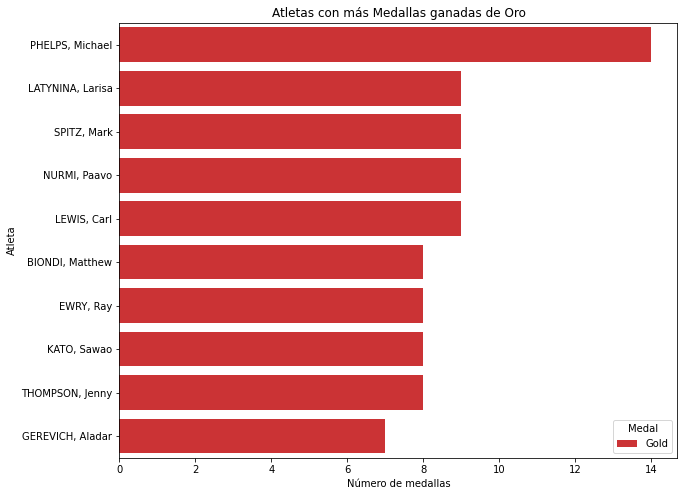

In [31]:
Grafico51(Datos,'Gold',10) 

In [32]:
 medallero(Datos,'Silver',10) 

,Medal,Discipline,NOC,Country.1,Athlete,len
916,Silver,Swimming,USA,United States,"BABASHOFF, Shirley Farber",6
5104,Silver,Artistic G.,URS,Unknown,"DITYATIN, Aleksandr",6
23670,Silver,Artistic G.,URS,Unknown,"VORONIN, Mikhail",6
23126,Silver,Dressage,NED,Netherlands,"VAN GRUNSVEN, Anky",5
13814,Silver,Fencing,ITA,Italy,"MANGIAROTTI, Edoardo",5
13062,Silver,Artistic G.,URS,Unknown,"LISITSKY, Viktor",5
22380,Silver,Artistic G.,URS,Unknown,"TITOV, Yuri",5
14095,Silver,Fencing,ITA,Italy,"MARZI, Gustavo",5
543,Silver,Artistic G.,URS,Unknown,"ANDRIANOV, Nikolay",5
8499,Silver,Swimming,GER,Germany,"HASE, Dagmar",5


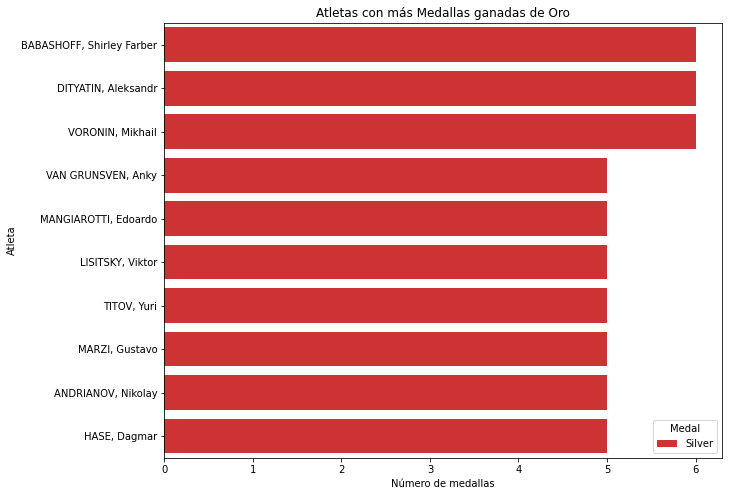

In [33]:
Grafico51(Datos,'Silver',10) 

In [34]:
medallero(Datos,'Bronze',10)

,Medal,Discipline,NOC,Country.1,Athlete,len
15754,Bronze,Artistic G.,RUS,Russia,"NEMOV, Alexei",6
23011,Bronze,Swimming,GER,Germany,"VAN ALMSICK, Franziska",6
16622,Bronze,Athletics,JAM,Jamaica,"OTTEY-PAGE, Merlene",6
19563,Bronze,Artistic G.,FIN,Finland,"SAVOLAINEN, Heikki",6
18405,Bronze,Fencing,FRA,France,"REVENU, Daniel",5
2917,Bronze,Swimming,GER,Germany,"BUSCHSCHULTE, Antje",5
5618,Bronze,Athletics,CAN,Canada,"EDWARDS, Philip",5
4619,Bronze,Fencing,NED,Netherlands,"DE JONG, Adrianus Egbertus Willem",5
16150,Bronze,Fencing,FRA,France,"NOËL, Christian",4
19641,Bronze,Artistic G.,BLR,Belarus,"SCHERBO, Vitaly",4


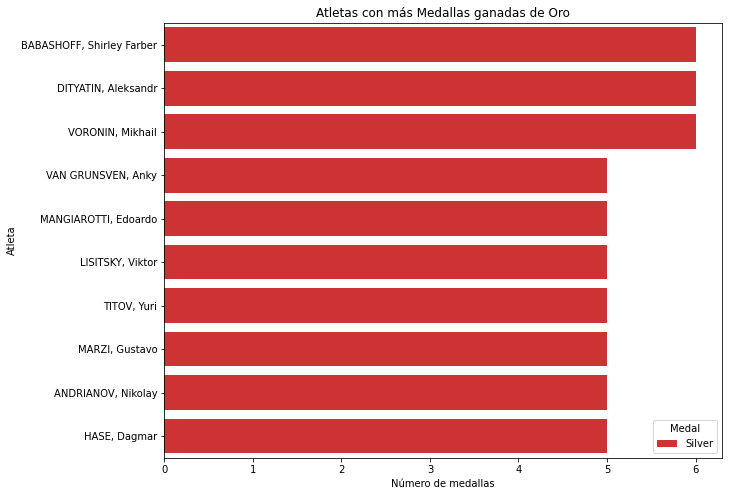

In [35]:
Grafico51(Datos,'Silver',10) 